# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from sympy import symbols, diff

from math import log
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Example 1  cost function

## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
#make data
x_1 = np.linspace(start = -3, stop = 3, num = 500)

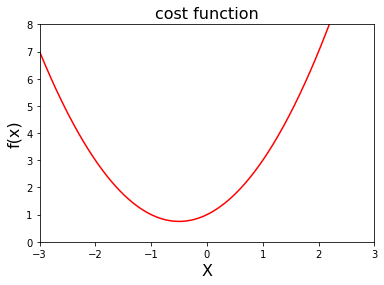

In [4]:
#plot
plt.plot(x_1, f(x_1), color = 'red')
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title('cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.show()

# Slope or gradient and derivatives

## python function for derivative of f(x)

###  $$df(x) = 2x + 1$$

In [5]:
def df(x):
    return 2*x + 1

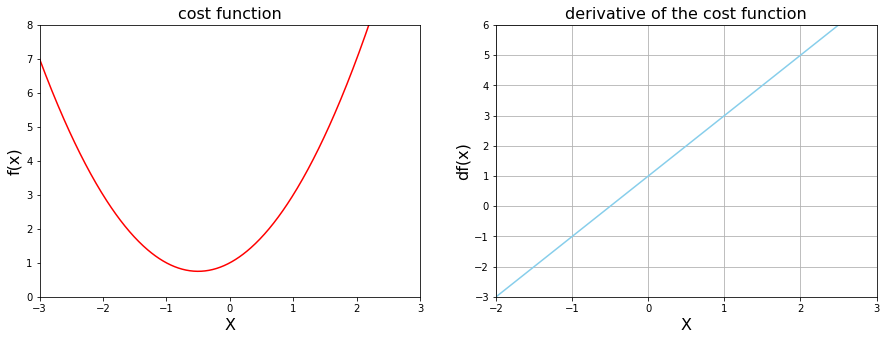

In [6]:
#plot for the cost funtion


plt.figure(figsize= [15, 5])

plt.subplot(1, 2, 1)
plt.plot(x_1, f(x_1), color = 'red')

plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title('cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)



#plot for the derivative

plt.subplot(1, 2, 2)
plt.plot(x_1, df(x_1), color = 'skyblue')
plt.grid()

plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.title('derivative of the cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(x)', fontsize = 16)



plt.show()

#  Gradient Descent

In [7]:
#Gradient Descent 
new_x = 3
previous_x = 0
step_multiplier = 0.1  #loss fucntion 
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]


for n in range(500):
     previous_x = new_x     #step 1
     gradient = df(previous_x)  # loss function
     new_x = previous_x - step_multiplier * gradient
        
     step_size = abs(new_x - previous_x)
     #print(step_size)
     
     x_list.append(new_x)
     slope_list.append(df(new_x))
        
     if step_size < precision:
        print('loop ran this many time:', n)
        break
        
    
print('local minimum occurs at: ', new_x)
print('slope or df(x) value this point is :', df(new_x))
print('f(x) the cost function value:', f(new_x))
    

loop ran this many time: 40
local minimum occurs at:  -0.49962781616118024
slope or df(x) value this point is : 0.0007443676776395236
f(x) the cost function value: 0.7500001385208099


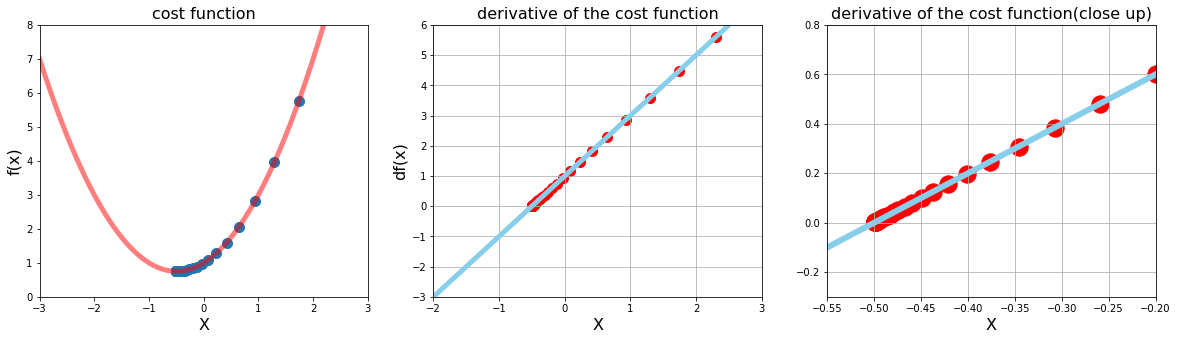

In [8]:
#Superimposed the gradient descent calculation on the plot

plt.figure(figsize= [20, 5])

plt.subplot(1, 3, 1)
plt.plot(x_1, f(x_1), color = 'red', linewidth = 5, alpha = 0.5)

plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title('cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

values = np.array(x_list)

plt.scatter(x_list , f(values), s = 100)


#plot for the derivative

plt.subplot(1, 3, 2)
plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 5)
plt.grid()

plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.title('derivative of the cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(x)', fontsize = 16)

values = np.array(slope_list)
plt.scatter(x_list , slope_list, s = 100, color = 'red')


#derivative Closeup

plt.subplot(1, 3, 3)
plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 6)
plt.grid()

plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.title('derivative of the cost function(close up)', fontsize = 16)
plt.xlabel('X', fontsize = 16)



plt.scatter(x_list , slope_list, s = 300, color = 'red')


plt.show()

plt.show()


 #  Example 2 : mulitple minima vs initial Guess  and Advanced function

##   $$g(x) = x^4 - 4x^2 + 5$$

In [9]:
#make some data
x_2 = np.linspace(start = -2, stop = 2, num = 1000)

In [10]:
def g(x):
    return x**4 - 4*x**2 + 5

In [11]:
def dg(x):
    return 4*x**3 - 8*x

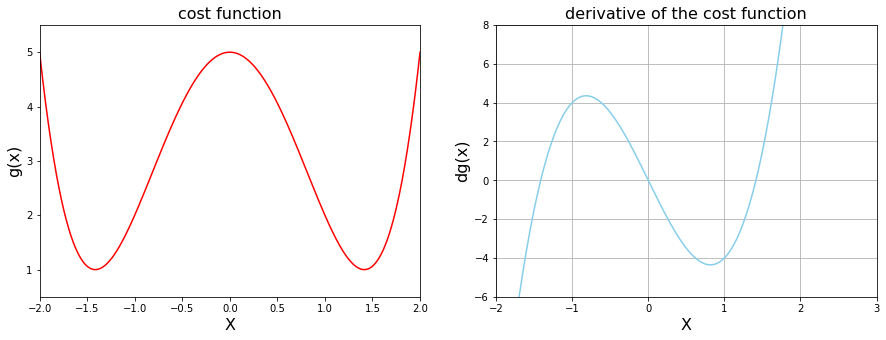

In [12]:
#plot for the cost funtion


plt.figure(figsize= [15, 5])

plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), color = 'red')

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)



#plot for the derivative

plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), color = 'skyblue')
plt.grid()

plt.xlim(-2, 3)
plt.ylim(-6, 8)

plt.title('derivative of the cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)
 
plt.show()

## Gradient Descent as a python function 

In [13]:
def gradient_descent(derivative_func, initial_guess, multiplier, precision, max_iter = 300):

    new_x = initial_guess
     
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]


    for n in range(max_iter):
         previous_x = new_x     #step 1
         gradient = derivative_func(previous_x)  # loss function
         new_x = previous_x - multiplier * gradient

         step_size = abs(new_x - previous_x)

         x_list.append(new_x)
         slope_list.append(derivative_func(new_x))

         if step_size < precision:
                break
    return new_x, x_list, slope_list
 

In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func= dg, initial_guess = -0.5,
                                                multiplier= 0.02, precision= 0.001)

print('local minimum occurs at: ', local_min)
print('Number of steps: ', len(list_x))

local minimum occurs at:  -1.4122375085019094
Number of steps:  23


In [15]:
local_min, list_x, deriv_list = gradient_descent(derivative_func= dg, initial_guess = -0.5,
                                                multiplier= 0.01, precision= 0.0001)

print('local minimum occurs at: ', local_min)
print('Number of steps: ', len(list_x))

local minimum occurs at:  -1.4137636556157256
Number of steps:  56


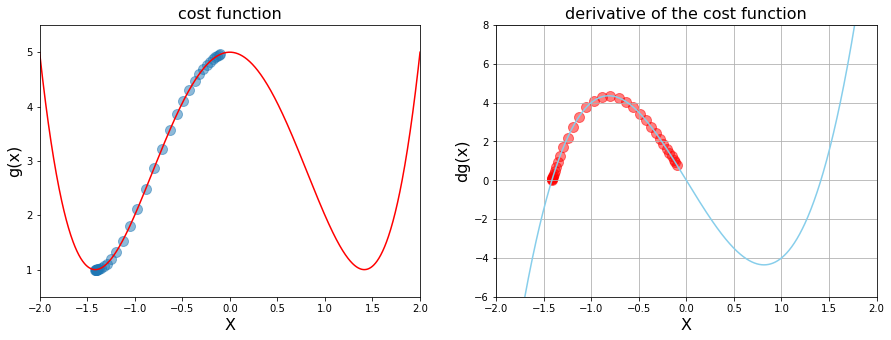

In [16]:
# calling the gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func= dg, initial_guess = -0.1,
                                                multiplier= 0.02, precision= 0.001)

#plot funtion, derivative and scatter plot


plt.figure(figsize= [15, 5])

plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), color = 'red')

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)
    
plt.scatter(list_x, g(np.array(list_x)), s= 100 , alpha = 0.5)

#plot for the derivative

plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), color = 'skyblue')
plt.grid()

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title('derivative of the cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)

plt.scatter(list_x, deriv_list, color = 'red', s= 100 , alpha = 0.5)

plt.show()

# Example-3  Divergence , overflow, Tuples
## $$ h(x) = x^5 - 2x^4 + 2$$

In [17]:
#make data
x_3 = np.linspace(start = -2.5, stop = 2.5, num = 1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3 

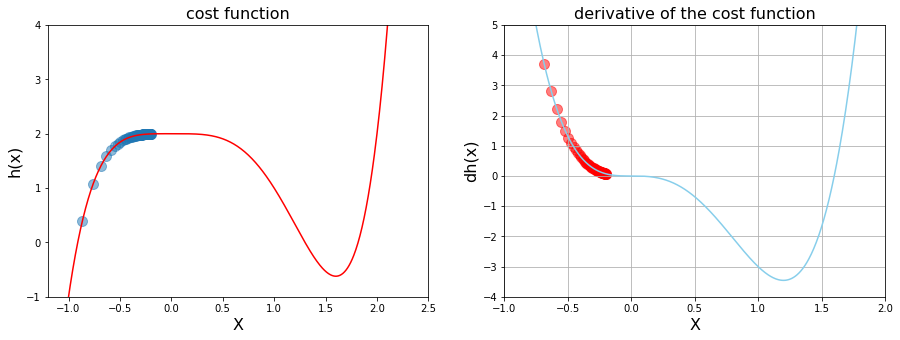

The local min occurs at : -1.8398461123332792e+24
The cost function occurs at: -2.1081790694225687e+121
The number of steps taken : 72


In [18]:
# calling the gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func= dh, initial_guess = -0.2,
                                                multiplier= 0.02, precision= 0.001, max_iter = 71)

#plot funtion, derivative and scatter plot


plt.figure(figsize= [15, 5])

plt.subplot(1, 2, 1)
plt.plot(x_3, h(x_3), color = 'red')

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('h(x)', fontsize = 16)
    
plt.scatter(list_x, h(np.array(list_x)), s= 100 , alpha = 0.5)

#plot for the derivative

plt.subplot(1, 2, 2)
plt.plot(x_3, dh(x_3), color = 'skyblue')
plt.grid()

plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.title('derivative of the cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dh(x)', fontsize = 16)

plt.scatter(list_x, deriv_list, color = 'red', s= 100 , alpha = 0.5)

plt.show()


print('The local min occurs at :', local_min)
print('The cost function occurs at:', h(local_min))
print('The number of steps taken :', len(list_x))


In [19]:
data_tuple = gradient_descent(derivative_func= dh, initial_guess = -0.2,
                                                multiplier= 0.02, precision= 0.001, max_iter = 71)

In [20]:
print('The local min occurs at :', data_tuple[0])
print('The cost function occurs at:', h(data_tuple[0]))
print('The number of steps taken :', len(data_tuple[1]))

The local min occurs at : -1.8398461123332792e+24
The cost function occurs at: -2.1081790694225687e+121
The number of steps taken : 72


# Learning rate

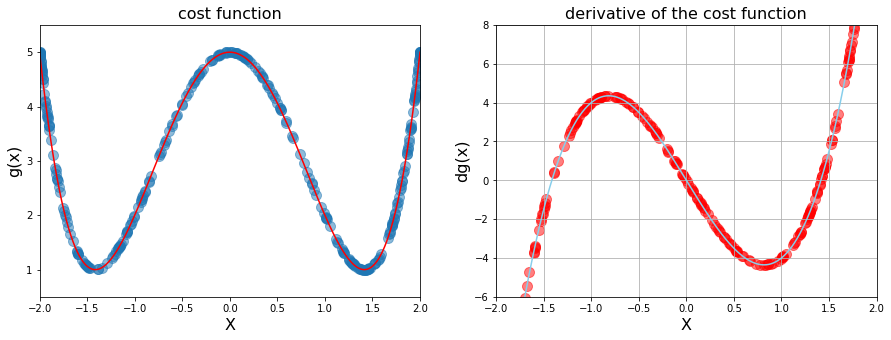

In [21]:
# calling the gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func= dg, initial_guess = 1.9,
                                                multiplier= 0.25, precision= 0.001, max_iter = 300)

#plot funtion, derivative and scatter plot


plt.figure(figsize= [15, 5])

plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), color = 'red')

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)
    
plt.scatter(list_x, g(np.array(list_x)), s= 100 , alpha = 0.5)

#plot for the derivative

plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), color = 'skyblue')
plt.grid()

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title('derivative of the cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)

plt.scatter(list_x, deriv_list, color = 'red', s= 100 , alpha = 0.5)

plt.show()

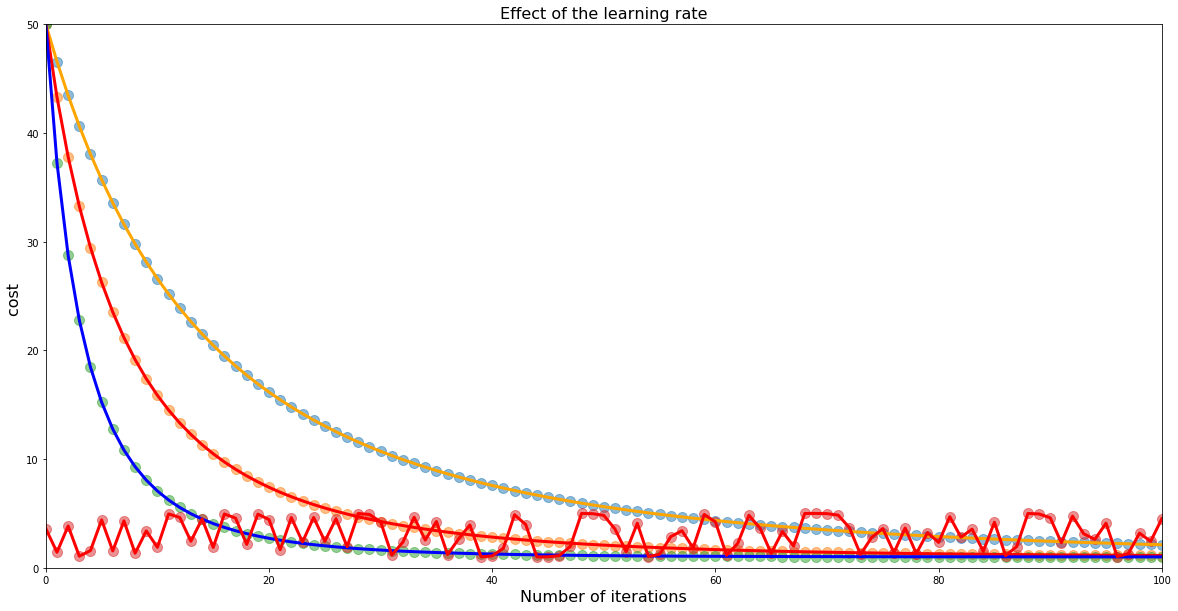

In [22]:
# Run gradient descent function 3 times
n = 100
low_gamma = gradient_descent(derivative_func= dg, initial_guess = 3,
                                                multiplier= 0.0005, precision= 0.0001, max_iter = n )

mid_gamma = gradient_descent(derivative_func= dg, initial_guess = 3,
                                                multiplier= 0.001, precision= 0.0001, max_iter = n )

high_gamma = gradient_descent(derivative_func= dg, initial_guess = 3,
                                                multiplier= 0.002, precision= 0.0001, max_iter = n )

insane_gamma = gradient_descent(derivative_func= dg, initial_guess = 1.9,
                                                multiplier= 0.25, precision= 0.001, max_iter = n)



# plot reduction in cost for each iteration
    
plt.figure(figsize= [20, 10])

plt.xlim(0 , n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize = 16)
plt.xlabel('Number of iterations', fontsize = 16)
plt.ylabel('cost ', fontsize = 16)

#values for our charts
# 1) Y-Axis data : convert the list in arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
#insane_values = np.array(insane_gamma[1])

#2) x_axis data : 
iteration_list  = list(range(0 , n+1))


#1) Plotting low learning rate
plt.plot(iteration_list, g(low_values), color = 'orange' , linewidth = 3)    
plt.scatter(iteration_list, g(np.array(low_values)), s= 100 , alpha = 0.5)

#2) Plotting mid learning rate
plt.plot(iteration_list, g(mid_values), color = 'red' , linewidth = 3)    
plt.scatter(iteration_list, g(np.array(mid_values)), s= 100 , alpha = 0.5)

#3) Plotting high learning rate
plt.plot(iteration_list, g(high_values), color = 'blue' , linewidth = 3)    
plt.scatter(iteration_list, g(np.array(high_values)), s= 100 , alpha = 0.5)

#4) Plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color = 'red' , linewidth = 3)    
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), s= 100 , alpha = 0.5)

plt.show()

## Example 4
## Data Visualisation with 3D charts 

## Minimise $$f(x, y) = \frac{1}{3^{-x^2-y^2}+1}$$

Minimize $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2-y^2}$

In [23]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [24]:
#Make the data
x_4 = np.linspace(start = -2, stop = 2, num = 200)
y_4 = np.linspace(start = -2, stop = 2, num = 200)

x_4, y_4 = np.meshgrid(x_4, y_4)
x_4.shape

(200, 200)

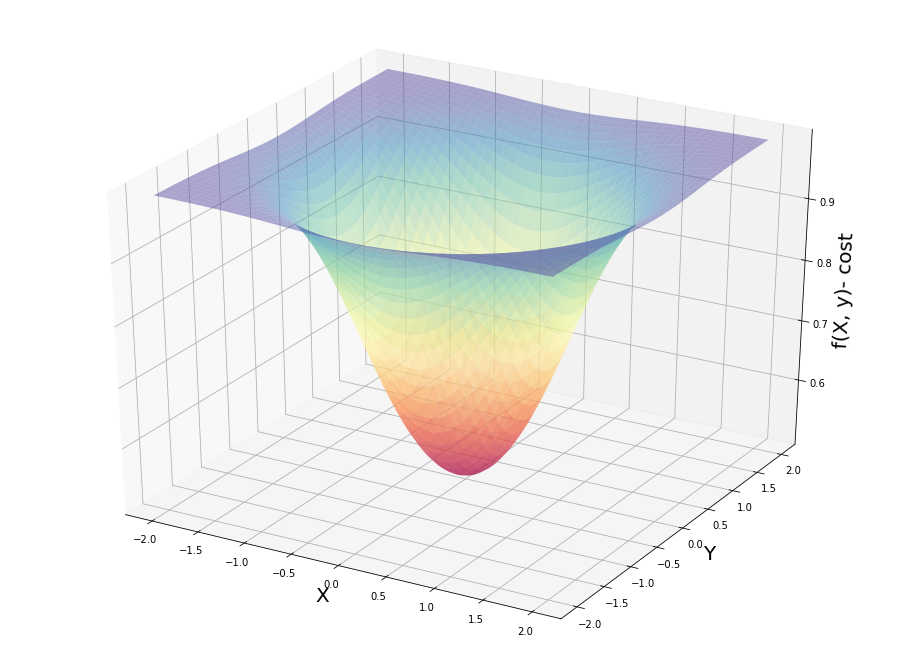

In [25]:
#Generating the #3D plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection = '3d')

ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(X, y)- cost ', fontsize = 20)


ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap = cm.Spectral, alpha = 0.5)
plt.show()

# Partial derivatives and symbolic computation

In [26]:
a, b = symbols('x, y')
print('Our cost function f(x,y) is :', f(a, b))

print('Partial derivative wrt x is :',diff(f(a,b), a))

print('Value of f(x, y) at x= 1.8, y = 1.0 is:',f(a, b).evalf(subs ={a : 1.8, b : 1.0}))

print('value of partial derivative wrt x:',diff(f(a, b),a).evalf(subs ={a : 1.8, b : 1.0}))

Our cost function f(x,y) is : 1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is : 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x= 1.8, y = 1.0 is: 0.990604794032582
value of partial derivative wrt x: 0.0368089716197505


# Batch Gradient descent with sympy

In [27]:
#setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs= {a: params[0], b: params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a: params[0], b: params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
print('Values in the gradient array :', gradients)
print('minimum occurs at the x value of :', params[0])
print('minimum occurs at the y value of :', params[1])
print('THe cost function is :', f(params[0], params[1]))

Values in the gradient array : [2.01013037525579e-11 1.11673909736433e-11]
minimum occurs at the x value of : 3.45838599885832e-11
minimum occurs at the y value of : 1.92132555492129e-11
THe cost function is : 0.500000000000000


In [28]:
print('Partial derivative wrt x is :',diff(f(a,b), a))

Partial derivative wrt x is : 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2


# Partial derivatives

## $$\frac{\partial f}{\partial x} =  \frac {2x ln(3) \cdot 3^{-x^2 - y^2} }{ \left( 3^{-x^2 - y^2} + 1 \right) ^2 }$$

## $$\frac{\partial f}{\partial y} =  \frac {2y ln(3) \cdot 3^{-x^2 - y^2} }{ \left( 3^{-x^2 - y^2} + 1 \right) ^2 }$$

In [29]:
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

In [30]:
def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [31]:
#setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iter):
    gradient_x = fpx (params[0], params[1])
    gradient_y = fpy (params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
print('Values in the gradient array :', gradients)
print('minimum occurs at the x value of :', params[0])
print('minimum occurs at the y value of :', params[1])
print('THe cost function is :', f(params[0], params[1]))

Values in the gradient array : [2.01013038e-11 1.11673910e-11]
minimum occurs at the x value of : 3.458385998858304e-11
minimum occurs at the y value of : 1.9213255549212797e-11
THe cost function is : 0.5


## Graphing  3D gradient Descent and numpy arrays 

In [32]:
#setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess
values_array = params.reshape(1,2)
print(values_array.shape)
for n in range(max_iter):
    gradient_x = fpx (params[0], params[1])
    gradient_y = fpy (params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis = 0 )
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis = 0)
    
print('Values in the gradient array :', gradients)
print('minimum occurs at the x value of :', params[0])
print('minimum occurs at the y value of :', params[1])
print('THe cost function is :', f(params[0], params[1]))

(1, 2)
Values in the gradient array : [2.01013038e-11 1.11673910e-11]
minimum occurs at the x value of : 3.458385998858304e-11
minimum occurs at the y value of : 1.9213255549212797e-11
THe cost function is : 0.5


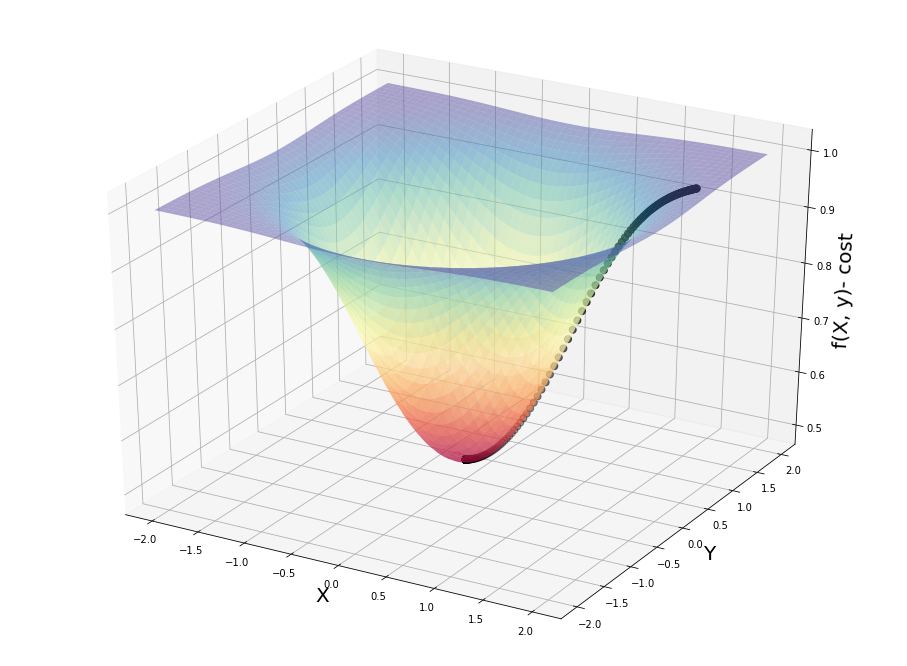

In [33]:
#Generating the #3D plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection = '3d')

ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(X, y)- cost ', fontsize = 20)


ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap = cm.Spectral, alpha = 0.5)
ax.scatter(values_array[:,0], values_array[:, 1], f(values_array[:,0], values_array[:, 1]),
           s = 50, c = 'black')
plt.show()

# Example 5 - Working with data & A Real cost function
## Mean Squared error cost function for regression problems

### $$ RSS = \sum_{i=1}^n  \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$ MSE = \frac {1}{n}  \sum_{i=1}^n  \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$ MSE = \frac {1}{n}  \sum_{i=1}^n  \big( y - \hat y \big)^2 $$

In [34]:
#make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('shape of x_5 array:', x_5.shape)
print('shape of y_5 array:', y_5.shape)

shape of x_5 array: (7, 1)
shape of y_5 array: (7, 1)


In [35]:
#Quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
print('Theta 0 :', regr.intercept_[0])
print('theta 1 :', regr.coef_[0][0])

Theta 0 : 0.8475351486029536
theta 1 : 1.2227264637835915


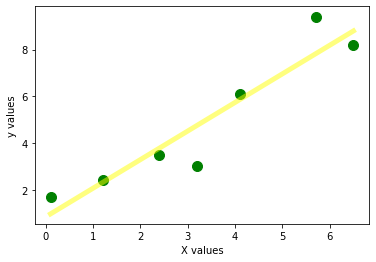

In [37]:
plt.scatter(x_5, y_5, s = 100, c = 'green')
plt.plot(x_5, regr.predict(x_5), c= 'yellow', linewidth = 5, alpha = 0.5 )
plt.xlabel('X values')
plt.ylabel('y values')
plt.show()

In [38]:
#y_hat = theta0 + theta1 * x
y_hat = 0.8475351486029536 + 1.2227264637835915 * x_5

In [39]:
print( 'Estimated values of the y_hat are:\n', y_hat)
print('Actual value of y :\n', y_5)

Estimated values of the y_hat are:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Actual value of y :
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [40]:
def mse(y, y_hat):
    #mse_calc = (1)/(y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis = 0)
    return mse_calc

In [41]:
print('the manually calculated mse:', mse(y_5, y_hat))

the manually calculated mse: [0.94796558]


In [42]:
from sklearn.metrics import mean_squared_error

print(' The inbult calc mean_sqared error', mean_squared_error(y_5, y_hat))

 The inbult calc mean_sqared error 0.9479655759794577


In [43]:
print('The mse regression:',mean_squared_error(y_5, regr.predict(x_5)))

The mse regression: 0.9479655759794577


## 3D plot for mse function
## Make data for thetas

In [44]:
nr_thetas = 200
th_0 = np.linspace(start = -1, stop = 3, num = nr_thetas)
th_1 = np.linspace(start = -1, stop = 3, num = nr_thetas)

plot_t0, plot_t1 = np.meshgrid(th_0, th_1) 

## calc mse using nested loops 

In [45]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)
        
print('Shape of the plot_t0:', plot_t0.shape)
print('Shape of the plot_t1:', plot_t1.shape)
print('Shape of the plot_cost:', plot_cost.shape)

Shape of the plot_t0: (200, 200)
Shape of the plot_t1: (200, 200)
Shape of the plot_cost: (200, 200)


In [46]:
plot_cost

array([[108.51285714, 108.14283763, 107.77362617, ...,  51.2194266 ,
         51.00859498,  50.79857143],
       [106.88158925, 106.51424787, 106.14771456, ...,  50.11575289,
         49.90759941,  49.700254  ],
       [105.262904  , 104.89824077, 104.5343856 , ...,  49.02466182,
         48.81918649,  48.61451922],
       ...,
       [ 30.0738157 ,  30.23139037,  30.38977309, ...,  76.71643873,
         77.03320129,  77.35077191],
       [ 30.92133081,  31.08158362,  31.24264449, ...,  78.09154801,
         78.41098872,  78.73123749],
       [ 31.78142857,  31.94435952,  32.10809853, ...,  79.47923995,
         79.8013588 ,  80.12428571]])

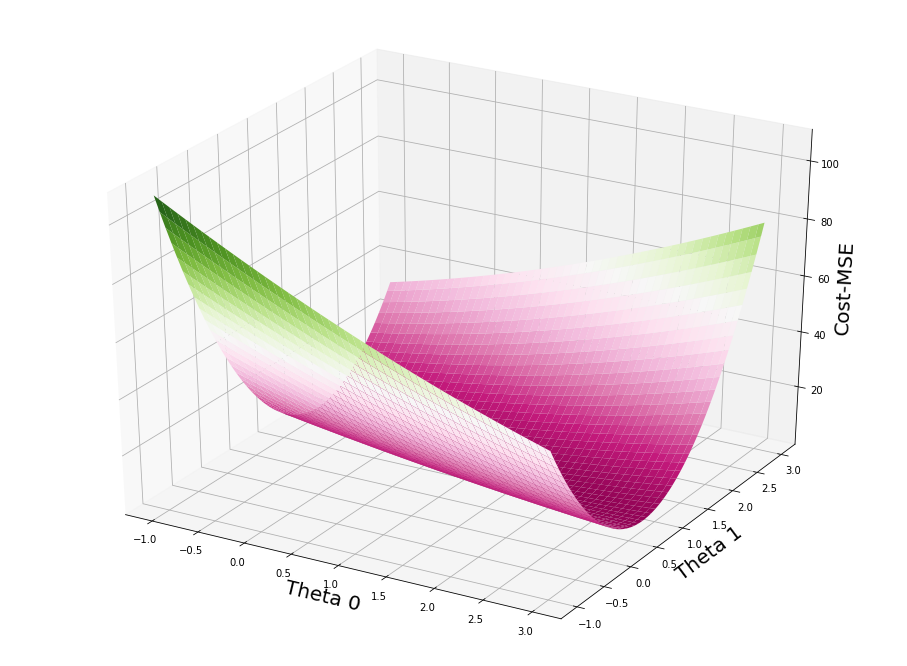

In [47]:
#Plotting MSE
fig = plt.figure(figsize= [16, 12])
ax = fig.gca(projection = '3d')

ax.set_xlabel('Theta 0', fontsize = 20)
ax.set_ylabel('Theta 1', fontsize = 20)
ax.set_zlabel('Cost-MSE', fontsize = 20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap = cm.PiYG)
plt.show()

In [48]:
print('The minimum of the plot cost :', plot_cost.min())
ij_min = np.unravel_index(indices = plot_cost.argmin(), shape = plot_cost.shape)
print('The minimum occurs at i,j:', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])

The minimum of the plot cost : 0.9483826526747164
The minimum occurs at i,j: (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


# partial derivative WRT $\theta_0$  and $\theta_1$

## $$ \frac{\partial{MSE}}{\partial{\theta_0}} = - \frac{2}{n} \sum_{i=1}^n  \big( y^{(i)} - \theta_0 -\theta_1 x^{(i)} \big) $$

## $$ \frac{\partial{MSE}}{\partial{\theta_1}} = - \frac{2}{n} \sum_{i=1}^n  \big( y^{(i)} - \theta_0 -\theta_1 x^{(i)} \big)  \big( x^{(i)}  \big) $$

# MSE and Gradient

In [49]:
def grad(x, y, thetas):
    n = y.size
    
    theta0_slope = (-2/n) * sum(y - thetas[0]- thetas[1] * x)
    theta1_slope = (-2/n) * sum((y - thetas[0]- thetas[1] * x)*x)
    
    
    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr = theta0_slope , values = theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis = 0)

In [50]:
multiplier= 0.01
thetas = np.array([2.9, 2.9])

plot_vals= thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5 , thetas)

    #append the new values to the numpy array
    plot_vals = np.concatenate((plot_vals , thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr= mse_vals, values= mse(y_5, thetas[0] + thetas[1]*x_5))                           
    
#Results
print('Minimum occurs at Theta 0:', thetas[0])
print('Minimum occurs at Theta 1:', thetas[1])
print('Mse is :', mse(y_5, thetas[0]+thetas[1]*x_5 ))

Minimum occurs at Theta 0: 0.8532230461743415
Minimum occurs at Theta 1: 1.2214935332607393
Mse is : [0.94797511]


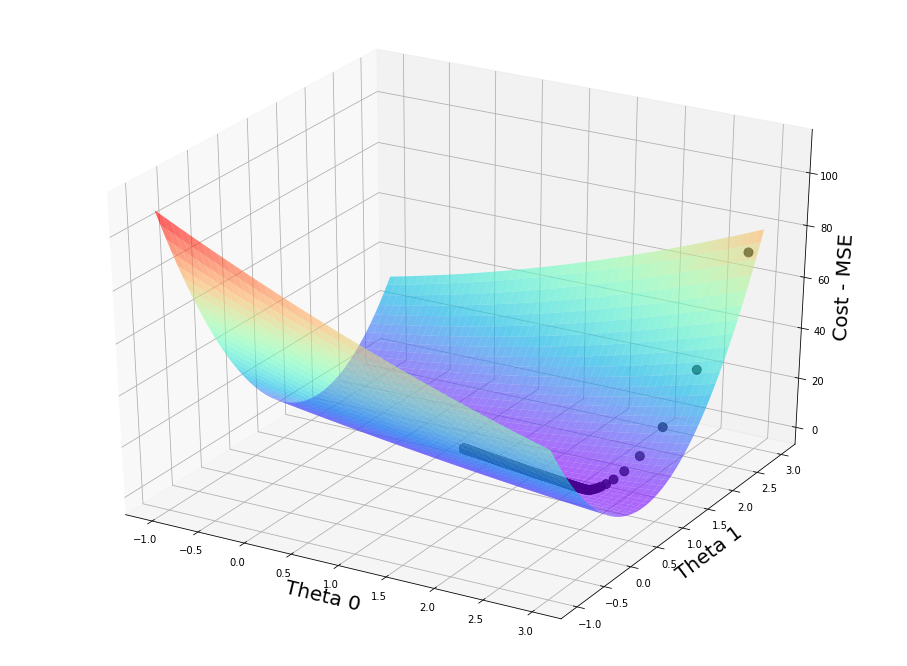

In [51]:
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')


ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap = cm.rainbow, alpha=0.6)
ax.scatter(plot_vals[:, 0],plot_vals[:, 1], mse_vals, s=80, color='black')
plt.show()